### mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os, sys

current_path = '/content/drive/My Drive/Colab Notebooks/JnQ/'

os.chdir(current_path)

Mounted at /content/drive


# requirements

In [18]:
!pip install mpl_finance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from matplotlib import gridspec
import mpl_finance as mf

from funcs_indicator import *
from funcs_for_trade import *

### load data

In [ ]:
os.chdir(current_path)


interval = '30m'
date_path = './candlestick_concated/%s/2021-04-27/' % interval
date_path = './candlestick_concated/%s/2021-05-17/' % interval
file_list = os.listdir(date_path)

print((file_list))

['2021-05-17 BTCUSDT.xlsx', '2021-05-17 ETHUSDT.xlsx', '2021-05-17 BCHUSDT.xlsx', '2021-05-17 XRPUSDT.xlsx', '2021-05-17 EOSUSDT.xlsx', '2021-05-17 LTCUSDT.xlsx', '2021-05-17 ETCUSDT.xlsx', '2021-05-17 LINKUSDT.xlsx', '2021-05-17 XLMUSDT.xlsx', '2021-05-17 ADAUSDT.xlsx', '2021-05-17 XMRUSDT.xlsx', '2021-05-17 SXPUSDT.xlsx', '2021-05-17 KAVAUSDT.xlsx', '2021-05-17 BANDUSDT.xlsx', '2021-05-17 DASHUSDT.xlsx', '2021-05-17 ZECUSDT.xlsx', '2021-05-17 XTZUSDT.xlsx', '2021-05-17 BNBUSDT.xlsx', '2021-05-17 ATOMUSDT.xlsx', '2021-05-17 ONTUSDT.xlsx', '2021-05-17 IOTAUSDT.xlsx', '2021-05-17 BATUSDT.xlsx', '2021-05-17 NEOUSDT.xlsx', '2021-05-17 QTUMUSDT.xlsx', '2021-05-17 WAVESUSDT.xlsx', '2021-05-17 MKRUSDT.xlsx', '2021-05-17 SNXUSDT.xlsx', '2021-05-17 DOTUSDT.xlsx', '2021-05-17 THETAUSDT.xlsx', '2021-05-17 ALGOUSDT.xlsx', '2021-05-17 KNCUSDT.xlsx', '2021-05-17 ZRXUSDT.xlsx', '2021-05-17 COMPUSDT.xlsx', '2021-05-17 OMGUSDT.xlsx']


### save sample res_dfs

In [ ]:
save_path = './candlestick_concated/30m/quant_v2/'
res_df_files = os.listdir(save_path)

print(res_df_files)

res_df_dict = {}

max_cnt = 120
sample_cnt = max_cnt

for k_i, key in enumerate(res_df_files):
  # if '2021-04-30'.upper() not in key:
  # if '2021-05-30'.upper() not in key:
  # if '2021-06-30'.upper() not in key:
  # if '2021-07-03'.upper() not in key:
  # if '2021-07-01'.upper() not in key:
  if '2021-08-31'.upper() not in key:
    continue

  # if "link".upper() not in key:
  # if "eth".upper() not in key:
  #   continue
  
  if sample_cnt == max_cnt:
    dict_name = "%s_res_dfs.pkl" % key.split(".")[0]
    print("dict_name :", dict_name)

  res_df = pd.read_excel(save_path + key, index_col=0)  

  res_df_dict[key] = res_df
  print(key, "saved to dict !")

  #     save with pickle    #
  with open(save_path + dict_name, 'wb') as f:
    pickle.dump(res_df_dict, f)

  sample_cnt -= 1

  if sample_cnt <= 0:
    break


## load res_df_dict

In [3]:
save_path = './candlestick_concated/res_df/'
dict_name = "2021-06-30 ETHUSDT_sartrend_backi2_res_dfs.pkl"
dict_name = "2021-07-01 ETHUSDT_backi2_res_dfs.pkl"
dict_name = "2021-07-01 BTCUSDT_majorst_on30_backi2_res_dfs.pkl"

save_path = './candlestick_concated/30m/quant_v2/'
dict_name = "2021-08-31 SUSHIUSDT_res_dfs.pkl"


#     load with pickle    #
with open(save_path + dict_name, 'rb') as f:
  res_df_dict = pickle.load(f)

print(dict_name, "loaded !")

2021-08-31 SUSHIUSDT_res_dfs.pkl loaded !


### basic fishing (not concerned about rapid descending)

start_stamp : 0
2021-08-31 SUSHIUSDT.xlsx loaded !
2021-08-31 CVCUSDT.xlsx loaded !
2021-08-31 BTSUSDT.xlsx loaded !
2021-08-31 HOTUSDT.xlsx loaded !
2021-08-31 ZRXUSDT.xlsx loaded !
2021-08-31 QTUMUSDT.xlsx loaded !
2021-08-31 IOTAUSDT.xlsx loaded !
2021-08-31 BTCBUSD.xlsx loaded !
2021-08-31 WAVESUSDT.xlsx loaded !
2021-08-31 ADAUSDT.xlsx loaded !
2021-08-31 LITUSDT.xlsx loaded !
2021-08-31 XTZUSDT.xlsx loaded !
2021-08-31 BNBUSDT.xlsx loaded !
2021-08-31 AKROUSDT.xlsx loaded !
2021-08-31 HNTUSDT.xlsx loaded !
2021-08-31 ETCUSDT.xlsx loaded !
2021-08-31 XMRUSDT.xlsx loaded !
2021-08-31 YFIUSDT.xlsx loaded !
2021-08-31 ETHUSDT.xlsx loaded !
len(ohlcv) : 14375


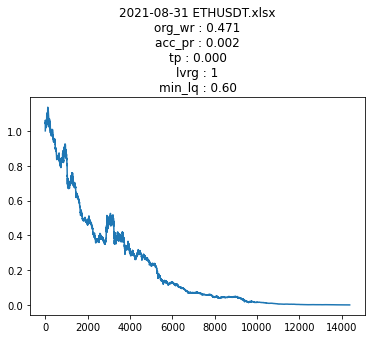

In [29]:
from tqdm.notebook import tqdm
from funcs_indicator import *
import matplotlib.pyplot as plt

# import mpl_finance as mf


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


start_stamp = 0
# start_stamp = datetime.timestamp(pd.to_datetime('2021-02-12'))
print("start_stamp :", start_stamp)
# break

# np.random.shuffle(file_list)
# candis = file_list

prev_x = None
total_x = None

seed = 1
random_state = 201
np.random.seed(seed)

fee = 0.0006
lvrg = 1

tp_list = np.arange(0.0, 0.05, 0.001)
tp_list = np.arange(0.0, 0.05, 0.051)
lvrg_list = range(1, 10)
lvrg_list = range(3, 7)
lvrg_list = range(6, 10)
lvrg_list = range(1, 4)
lvrg_list = range(1, 2)
# lvrg_list = range(5, 6)


for key, res_df in res_df_dict.items():

  print(key, "loaded !")

# for i in tqdm(range(len(candis))):

  if 'eth'.upper() not in key:
  # if 'eth'.upper() not in candis[i]:
    continue

  # for key in keys:  
    
    # ohlcv = pd.read_excel(date_path + key, index_col=0)
  ohlcv = res_df
  print('len(ohlcv) :', len(ohlcv))

  #     find best lvrg with lq    #
  for lvrg in lvrg_list:
    
    #       tp opt      #
    best_tp = None
    best_ap = 0
    best_pr = None

    #        find best tp       #
    for tp in tp_list:

      long_ep = ohlcv['close'].shift(1) * (1 / (tp + 1))

      #       long      #
      pr = (ohlcv['close'] / long_ep - fee - 1) * lvrg + 1
      #     set condition   #
      # pr = np.where(ohlcv['low'] < long_ep, pr, 1)

      #     const.    #
        # ------ ema ------ #
      # ohlcv['ema'] = ema(ohlcv['close'], 5)
      # pr = np.where(ohlcv['ema'].shift(1) <= ohlcv['close'].shift(1), pr, 1)
    
      lq = (ohlcv['low'] / long_ep - fee - 1) * lvrg + 1

      # plt.plot(np.cumprod(pr))
      # plt.show()
      # break

      #       short       #
      # s_pr = (-ohlcv['close'].pct_change() - fee) * lvrg + 1

      #       fill na with 1.0      #
      pr = np.where(np.isnan(pr), 1, pr)
      # avoid_pr = np.where(np.isnan(avoid_pr), 1, avoid_pr)
      lq = np.where(np.isnan(lq), 1, lq)
      # s_pr = np.where(np.isnan(s_pr), 1, pr)

      #       set lq      #
      pr = np.where((pr != 1) & (lq <= 0), 0, pr)
      # avoid_pr = np.where((avoid_pr != 1) & (lq <= 0), 0, avoid_pr)

      # plt.plot(np.cumprod(pr))
      # plt.title("%.3f" % tp)
      # plt.show()
      # plt.close()

      ap = np.cumprod(pr)[-1]
      if ap >= best_ap:
        best_ep = long_ep
        best_ap = ap
        best_tp = tp
        best_pr = pr

    best_pr = np.array(best_pr)
    org_wr = len(best_pr[best_pr > 1]) / len(best_pr[best_pr != 1])

    # plt.figure(figsize=(10, 4))
    plt.figure(figsize=(6, 4))
    # plt.subplot(121)
    plt.plot(np.cumprod(best_pr))
    plt.title("%s\norg_wr : %.3f\nacc_pr : %.3f\ntp : %.3f\nlvrg : %s\nmin_lq : %.2f" % (key, org_wr, np.cumprod(best_pr)[-1], best_tp, lvrg, min(lq)))

    
    #     avoid dropping    #      
    # ema = ohlcv['close'].ewm(span=190, min_periods=190-1, adjust=False).mean()
    # # avoid_pr = np.where(ohlcv['close'].shift(1) > ema.shift(1), test_pr, 1)

    # avoid_pr = np.where(ema.shift(1) > ema.shift(2), best_pr, 1)

    # # ma = ohlcv['close'].rolling(120).mean()
    # # avoid_pr = np.where(ma.shift(1) > ma.shift(2), best_pr, 1)

    # avoid_wr = len(avoid_pr[avoid_pr > 1]) / len(avoid_pr[avoid_pr != 1])

    
    # plt.subplot(122)
    # plt.plot(np.cumprod(avoid_pr))
    # plt.title("%s\navoid_wr : %.3f\nacc_pr : %.3f\ntp : %.3f\nlvrg : %s" % (key, avoid_wr, np.cumprod(avoid_pr)[-1], best_tp, lvrg))

    plt.show()

  break # pair loop








### plot_check

In [11]:
print(len(pr))
print(len(ohlcv))

3649
3649


In [27]:
# assert len(open_list) == len(trade_list), "len(open_list) != len(trade_list)"
res_df = ohlcv.copy()

save_plot = False
pr_descend = False


if save_plot:
  plot_check_dir = current_path + "plot_check/" +  key.replace(".xlsx", "")
  try:
    os.mkdir(plot_check_dir)
  except:

    #     remove existing dir   #
    shutil.rmtree(plot_check_dir)
    print(plot_check_dir, 'removed !')
    os.mkdir(plot_check_dir)
    # pass
    
prev_plotsize = 10
post_plotsize = 5

# inversion = True
inversion = False

# hedge = True
# hedge = False


# if inversion:  

#     plot_pr_list = rev_np_pr
#     h_plot_pr_list = h_rev_np_pr  # hedge

# else:

#     plot_pr_list = np_pr
#     try:
#       h_plot_pr_list = h_np_pr
#     except Exception as e:
#       print("error in h_plot_pr :", e)
#       h_plot_pr_list = np_pr


#         select plot columns       #
# basic_st_number = 2
# basic_st_list = ['ST1_Up%s' % basic_st_number, 'ST1_Down%s' % basic_st_number, 'ST2_Up%s' % basic_st_number, 'ST2_Down%s' % basic_st_number, 'ST3_Up%s' % basic_st_number, 'ST3_Down%s' % basic_st_number,
#                  'middle_line%s' % basic_st_number, 'upper_middle%s' % basic_st_number, 'lower_middle%s' % basic_st_number]

ohlc_list = ['open', 'high', 'low', 'close'] # + basic_st_list


# pline_number = 5
# pline_list = ['middle_line%s' % pline_number, 'upper_middle%s' % pline_number, 'lower_middle%s' % pline_number]

# pline_number2 = 6
# pline_list2 = ['middle_line%s' % pline_number2, 'upper_middle%s' % pline_number2, 'lower_middle%s' % pline_number2]


# senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a%s' % basic_st_number]
# senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b%s' % basic_st_number]
# senkoua_list = ['senkou_a1']
# senkoub_list = ['senkou_b1']

# sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar%s' % basic_st_number]
sar_list = ['sar1']

# ma_list = ['sma1', 'sma4']
ma_list = ['ema']


#     -------------- under price phase --------------    #
# macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist%s' % basic_st_number]
# macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3']
# trix_list = ['trix1', 'trix2', 'trix3', 'trix4', 'trix%s' % basic_st_number]
trix_list = ['trix1', 'trix2', 'trix3']
stoch_list = ['stoch']
fisher_list = ['fisher30', 'fisher60', 'fisher120']
cctbbo_list = ['cctbbo']
emaroc_list = ['ema_roc']


#       
# input_cols = basic_cols + sar_cols + ichimoku_cols + macd_cols + ichimoku_cols2
# input_colname = ohlc_list + senkoua_list + senkoub_list + sar_list + macd_list + trix_list
# input_colname = ohlc_list + senkoua_list + senkoub_list + sar_list + macd_list
# input_colname = ohlc_list + senkoua_list + senkoub_list + sar_list + macd_list + ma_list
# input_colname = ohlc_list + senkoua_list + senkoub_list + sar_list + ma_list + macd_list + stoch_list + fisher_list + cctbbo_list

# input_colname = ohlc_list + basic_st_list + pline_list + pline_list2 + senkoua_list + senkoub_list
input_colname = ohlc_list + ma_list
# yrange_colname = ohlc_list + basic_st_list + pline_list + pline_list2 + senkoua_list + senkoub_list # currently just used for ymin, ymax
yrange_colname = ohlc_list
# input_cols = basic_cols + sar_cols + ichimoku_cols + macd_cols


# aggr_obj = dict(zip(plot_pr_list, open_list, enumerate(trade_list)))
# aggr_obj = dict(zip(plot_pr_list, zip(open_list, enumerate(trade_list))))

# sorted_obj = sorted(aggr_obj.items(), key=(lambda x: x[0]), reverse=pr_descend)
# print(aggr_obj)
# print(sorted_obj)

# for t_i, (initial_i, i, j) in enumerate(trade_list):
# for t_i, (ep_idx_list_, tp_idx_list_) in enumerate(trade_list):
# for _, (open_idx, (t_i, (ep_idx_list_, tp_idx_list_))) in sorted_obj: # 0.699700153073042, (291402, (3014, ([370012], [370014])))
# for _, (open_idx, (t_i, (ep_idx_list_, tp_idx_list_))) in aggr_obj.items():
for i, profit in enumerate(pr):

  # print(i, j)

  if not(i >= prev_plotsize):
    continue

  # if i <= 4860:
  # if i == 1536:
  # if 100 < i < 1860:
  #   pass
  # else:
  #   continue

  # if tp_state_list[t_i] != 'd-open':
  #   continue

  # if (entry[i] == -1) and res_df['close'].iloc[i - 1] > short_ep.iloc[i]:
  #   pass
  # else:
  #   continue

  # if profit > 0.5:
  if profit >= 1.0:
  # if profit <= 1.0:
    continue

  j = i + 1

  # plot_df = res_df.iloc[i - prev_plotsize:j + post_plotsize, input_cols]
  plot_df = res_df.iloc[i - prev_plotsize:j + post_plotsize][input_colname]
  # plot_df = res_df.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize][input_colname]


  #       keep off-color st with another variable         #
  # st_trend_plot_df = res_df.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize, [7, 10, 13]]
  # st_trend_plot_df = res_df[['ST1_Trend2', 'ST2_Trend2', 'ST3_Trend2']].iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]
  # st_trend_plot_df = res_df[['ST1_Trend2', 'ST2_Trend2', 'ST3_Trend2', 'ST1_Trend%s' % basic_st_number, 'ST2_Trend%s' % basic_st_number, 'ST3_Trend%s' % basic_st_number]].iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]
  # st_trend_plot_df = res_df[['ST1_Trend%s' % basic_st_number, 'ST2_Trend%s' % basic_st_number, 'ST3_Trend%s' % basic_st_number]].iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]
  # htf_st_trend_plot_df = res_df[['ST1_Trend%s' % basic_st_number, 'ST2_Trend%s' % basic_st_number, 'ST3_Trend%s' % basic_st_number]].iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]

  y_max = max(np.max(plot_df[yrange_colname]))
  y_min = min(np.min(plot_df[yrange_colname]))

  if np.isnan(y_max) or np.isnan(y_min):
    continue
  # print("y_max, y_min :", y_max, y_min)
  # break
  
  # plot_df["off_color_upper_st1"] = np.where(st_trend_plot_df['ST1_Trend2'] == 1, plot_df['ST1_Up2'], np.nan)
  # plot_df["off_color_upper_st2"] = np.where(st_trend_plot_df['ST2_Trend2'] == 1, plot_df['ST2_Up2'], np.nan)
  # plot_df["off_color_upper_st3"] = np.where(st_trend_plot_df['ST3_Trend2'] == 1, plot_df['ST3_Up2'], np.nan)
  # plot_df["off_color_lower_st1"] = np.where(st_trend_plot_df['ST1_Trend2'] == -1, plot_df['ST1_Down2'], np.nan)
  # plot_df["off_color_lower_st2"] = np.where(st_trend_plot_df['ST2_Trend2'] == -1, plot_df['ST2_Down2'], np.nan)
  # plot_df["off_color_lower_st3"] = np.where(st_trend_plot_df['ST3_Trend2'] == -1, plot_df['ST3_Down2'], np.nan)

  # plot_df["off_color_upper_hst1"] = np.where(st_trend_plot_df['ST1_Trend%s' % basic_st_number] == 1, plot_df['ST1_Up%s' % basic_st_number], np.nan)
  # plot_df["off_color_upper_hst2"] = np.where(st_trend_plot_df['ST2_Trend%s' % basic_st_number] == 1, plot_df['ST2_Up%s' % basic_st_number], np.nan)
  # plot_df["off_color_upper_hst3"] = np.where(st_trend_plot_df['ST3_Trend%s' % basic_st_number] == 1, plot_df['ST3_Up%s' % basic_st_number], np.nan)
  # plot_df["off_color_lower_hst1"] = np.where(st_trend_plot_df['ST1_Trend%s' % basic_st_number] == -1, plot_df['ST1_Down%s' % basic_st_number], np.nan)
  # plot_df["off_color_lower_hst2"] = np.where(st_trend_plot_df['ST2_Trend%s' % basic_st_number] == -1, plot_df['ST2_Down%s' % basic_st_number], np.nan)
  # plot_df["off_color_lower_hst3"] = np.where(st_trend_plot_df['ST3_Trend%s' % basic_st_number] == -1, plot_df['ST3_Down%s' % basic_st_number], np.nan)


  # #       replace st values with np.nan, using st trend     #
  # # plot_df['ST1_Up2'] = np.where(st_trend_plot_df['ST1_Trend2'] == 1, np.nan, plot_df['ST1_Up2'])
  # # plot_df['ST2_Up2'] = np.where(st_trend_plot_df['ST2_Trend2'] == 1, np.nan, plot_df['ST2_Up2'])
  # # plot_df['ST3_Up2'] = np.where(st_trend_plot_df['ST3_Trend2'] == 1, np.nan, plot_df['ST3_Up2'])
  # # plot_df['ST1_Down2'] = np.where(st_trend_plot_df['ST1_Trend2'] == -1, np.nan, plot_df['ST1_Down2'])
  # # plot_df['ST2_Down2'] = np.where(st_trend_plot_df['ST2_Trend2'] == -1, np.nan, plot_df['ST2_Down2'])
  # # plot_df['ST3_Down2'] = np.where(st_trend_plot_df['ST3_Trend2'] == -1, np.nan, plot_df['ST3_Down2'])

  # plot_df['ST1_Up%s' % basic_st_number] = np.where(st_trend_plot_df['ST1_Trend%s' % basic_st_number] == 1, np.nan, plot_df['ST1_Up%s' % basic_st_number])
  # plot_df['ST2_Up%s' % basic_st_number] = np.where(st_trend_plot_df['ST2_Trend%s' % basic_st_number] == 1, np.nan, plot_df['ST2_Up%s' % basic_st_number])
  # plot_df['ST3_Up%s' % basic_st_number] = np.where(st_trend_plot_df['ST3_Trend%s' % basic_st_number] == 1, np.nan, plot_df['ST3_Up%s' % basic_st_number])
  # plot_df['ST1_Down%s' % basic_st_number] = np.where(st_trend_plot_df['ST1_Trend%s' % basic_st_number] == -1, np.nan, plot_df['ST1_Down%s' % basic_st_number])
  # plot_df['ST2_Down%s' % basic_st_number] = np.where(st_trend_plot_df['ST2_Trend%s' % basic_st_number] == -1, np.nan, plot_df['ST2_Down%s' % basic_st_number])
  # plot_df['ST3_Down%s' % basic_st_number] = np.where(st_trend_plot_df['ST3_Trend%s' % basic_st_number] == -1, np.nan, plot_df['ST3_Down%s' % basic_st_number])


  # plot_short_ep = short_ep.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]
  # plot_long_ep = long_ep.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]

  # # plot_upper_middle = plot_df['upper_middle2']
  # # plot_lower_middle = plot_df['lower_middle2']

  # plot_short_tp = short_tp.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]
  # plot_long_tp = long_tp.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]  


  # fig = trendln.plot_support_resistance(plot_df['close'], accuracy=8, fromwindows=False, numbest=1,  window=30) # requires matplotlib - pip install matplotlib

  # fig = plt.figure(figsize=(12, 16))
  fig = plt.figure(figsize=(8, 12))
  
  gs = gridspec.GridSpec(nrows=3, # row 몇 개 
                       ncols=1, # col 몇 개 
                       height_ratios=[3, 1, 1]
                      )
  
  # fig = plt.figure(figsize=(8, 12))
  # ax = fig.add_subplot(111)
  # ax = fig.add_subplot(311)
  ax = fig.add_subplot(gs[0])

  # fig.show()
  # fig.canvas.draw()

  temp_ohlc = plot_df.values[:, :4]
  index = np.arange(len(temp_ohlc))
  candle = np.hstack((np.reshape(index, (-1, 1)), temp_ohlc))
  mf.candlestick_ohlc(ax, candle, width=0.5, colorup='r', colordown='b')

  # plt.step(plot_df[['ST1_Up2', 'ST2_Up2', 'ST3_Up2']].values, 'r', alpha=1)  # upper on color
  # plt.step(plot_df[['ST1_Down2', 'ST2_Down2', 'ST3_Down2']].values, 'b', alpha=1)  # lower on color
  
  # plt.step(plot_df[['ST1_Up%s' % basic_st_number, 'ST2_Up%s' % basic_st_number, 'ST3_Up%s' % basic_st_number]].values, 'r', alpha=1, linewidth=1)  # major upper on color
  # plt.step(plot_df[['ST1_Down%s' % basic_st_number, 'ST2_Down%s' % basic_st_number, 'ST3_Down%s' % basic_st_number]].values, 'b', alpha=1, linewidth=1)  # major lower on color

  # # plt.step(plot_df[['middle_line2']].values, 'fuchsia', alpha=1)  # middle 
  
  # # plt.step(plot_df[['off_color_upper_st1', 'off_color_upper_st2', 'off_color_upper_st3']].values, 'r', alpha=1, linestyle=':')  # upper off color
  # # plt.step(plot_df[['off_color_lower_st1', 'off_color_lower_st2', 'off_color_lower_st3']].values, 'b', alpha=1, linestyle=':')  # lower off color
  
  # plt.step(plot_df[['off_color_upper_hst1', 'off_color_upper_hst2', 'off_color_upper_hst3']].values, 'r', alpha=1, linestyle=':', linewidth=1)  # major upper off color
  # plt.step(plot_df[['off_color_lower_hst1', 'off_color_lower_hst2', 'off_color_lower_hst3']].values, 'b', alpha=1, linestyle=':', linewidth=1)  # major lower off color


  # # plt.step(np.arange(len(plot_df)), plot_upper_middle.values, alpha=1, linestyle='--', color='g')  # 2nd middle
  # # plt.step(np.arange(len(plot_df)), plot_lower_middle.values, alpha=1, linestyle='--', color='g')  # 2nd middle

  # plt.step(plot_df[['middle_line%s' % basic_st_number]].values, 'fuchsia', alpha=1, linewidth=1)  # middle5 
  # plt.step(plot_df[['upper_middle%s' % basic_st_number]].values, 'g', linestyle='--', alpha=1, linewidth=1)  # middle5 
  # plt.step(plot_df[['lower_middle%s' % basic_st_number]].values, 'g', linestyle='--', alpha=1, linewidth=1)  # middle5 
  
  # plt.step(plot_df[['middle_line%s' % pline_number]].values, 'fuchsia', alpha=1, linewidth=2)  # middle5 
  # plt.step(plot_df[['upper_middle%s' % pline_number]].values, 'g', linestyle='--', alpha=1, linewidth=2)  # middle5 
  # plt.step(plot_df[['lower_middle%s' % pline_number]].values, 'g', linestyle='--', alpha=1, linewidth=2)  # middle5 
  
  # plt.step(plot_df[['middle_line%s' % pline_number2]].values, 'fuchsia', alpha=1, linewidth=4)  # middle5 
  # plt.step(plot_df[['upper_middle%s' % pline_number2]].values, 'g', linestyle='--', alpha=1, linewidth=4)  # middle5 
  # plt.step(plot_df[['lower_middle%s' % pline_number2]].values, 'g', linestyle='--', alpha=1, linewidth=4)  # middle5 
  
  # plt.step(np.arange(len(plot_df)), plot_short_ep.values, alpha=1, linestyle='--', color='y')  # ep
  # plt.step(np.arange(len(plot_df)),plot_long_ep.values, alpha=1, linestyle='--', color='y')  # ep

  # plt.step(np.arange(len(plot_df)), plot_short_tp.values, alpha=1, linestyle=':', color='y')  # tp
  # plt.step(np.arange(len(plot_df)), plot_long_tp.values, alpha=1, linestyle=':', color='y')  # tp



  # ---------------------- on price indicator part ---------------------- #

  # ---------------------- sma ---------------------- #
  alpha = 1
  for sm_i, sma in enumerate(ma_list):
    if sm_i > 0:
      lw = 5
    else:
      lw = 2
    plt.step(np.arange(len(plot_df)), plot_df[sma].values, alpha=alpha, color='black', linewidth=lw)
    alpha -= 0.2
  
  #               sar               #
  # alpha = 1
  # markersize = 5
  # for sar in sar_list:
  #   plt.step(plot_df[sar].values, 'c*', alpha=alpha, markersize=markersize, color='dodgerblue')  # sar mic
  #   markersize += 1
  #   alpha -= 0.1

  # plt.step(plot_df.values[:, [12]], 'co', alpha=1, markersize=7)  # sar mac

  #               cloud               #
  # alpha = 0.7
  # for senkoua, senkoub in zip(senkoua_list, senkoub_list):
  #   plt.fill_between(np.arange(len(plot_df)), plot_df[senkoua].values, plot_df[senkoub].values, # ichimoku
  #                     where=plot_df[senkoua].values >= plot_df[senkoub].values, facecolor='g', alpha=alpha) # ichimoku
  #   plt.fill_between(np.arange(len(plot_df)), plot_df[senkoua].values, plot_df[senkoub].values,
  #                     where=plot_df[senkoua].values <= plot_df[senkoub].values, facecolor='r', alpha=alpha)  
  #   alpha -= 0.05
  
  # # ------------------------------------------------------------- #


  # #       ep & tp     #
  # # if i != initial_i:
  # # if len(ep_idx_list_) > 1:
  
  # # ------------- initial order ------------- #
  plt.axvline(prev_plotsize, alpha=0.5, linestyle='--', color='lime')

  # for ep_i in range(len(ep_idx_list_)):
  #   plt.axvline(prev_plotsize + (ep_idx_list_[ep_i] - ep_idx_list_[0]), alpha=0.5, linestyle='--')

  # # plt.axvline(prev_plotsize, alpha=0.5, linestyle='--')
  # plt.axhline(ep_tp_list[t_i][0], linestyle='-', xmin=0.75, xmax=1, linewidth=3, color='lime')  # ep line axhline

  # for sub_i in range(len(ep_tp_list[t_i][1])):
  #   plt.axhline(ep_tp_list[t_i][1][sub_i], linestyle='-', xmin=0.75 + 0.05 * (sub_i + 1) , xmax=1, linewidth=3, color='lime')  # tp line axhline
  #   # plt.axhline(ep_tp_list[t_i][1], linestyle='-', xmin=0.9, xmax=1, linewidth=3)  # tp line axhline  
  #   plt.axvline(prev_plotsize + (tp_idx_list_[sub_i] - ep_idx_list_[0]), alpha=0.5, linestyle='--')


  # #         hedge ep & tp         #
  # h_i = h_trade_list[t_i][1]
  # if h_i is not None:
  #   plt.axvline(prev_plotsize + (h_i - ep_idx_list_[0]), linestyle='--')
  #   plt.axhline(h_ep_tp_list[t_i][0], linestyle='-', xmin=0.75, xmax=1, linewidth=3, color='magenta')  # ep line axhline
  #   plt.axhline(h_ep_tp_list[t_i][1], linestyle='-', xmin=0.85, xmax=1, linewidth=3, color='magenta')  # tp line axhline

  
  #         check pr        #
  # if not static_lvrg:
  #   plt.title("%s ~ %s -> %.5f\n %s\n h_pr : %.5f\nlvrg : %s\ntp_ratio : %.2f" % (ep_idx_list_[0], tp_idx_list_[-1], plot_pr_list[t_i], tp_state_list[t_i], h_plot_pr_list[t_i], lvrg_list[t_i], tp_ratio_list[t_i]))
  # else:
  #   plt.title("%s ~ %s -> %.5f\n %s\n h_pr : %.5f\ntp_ratio : %.2f" % (ep_idx_list_[0], tp_idx_list_[-1], plot_pr_list[t_i], tp_state_list[t_i], h_plot_pr_list[t_i], tp_ratio_list[t_i]))
  
  plt.title("pr : %.2f" % profit)

  # print("short real pr :", (ep_tp_list[t_i][0] / ep_tp_list[t_i][1][sub_i] - fee - 1) * lvrg + 1)
  # print("long real pr :", (ep_tp_list[t_i][1][sub_i] / ep_tp_list[t_i][0] - fee - 1) * lvrg + 1)

  #           y lim         #
  plt.ylim(y_min, y_max)


  # ---------------------- outer price indi. ---------------------- #
  #           macd          #
  # plt.subplot(312)
  # plt.subplot(gs[1])
  # alpha = 1
  # for macd in macd_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[macd].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2

  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=0.5, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')

  # plt.axhline(0, linestyle='--')

  
  # #           trix          #  
  # # plt.subplot(313)
  # plt.subplot(gs[2])
  # alpha = 1
  # for trix in trix_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[trix].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=0.5, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')
  # plt.axhline(0, linestyle='--')

  
  #           fisher          #  
  # plt.subplot(313)
  # plt.subplot(gs[1])
  # alpha = 1
  # for fisher in fisher_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[fisher].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
    
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=0.5, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')

  # plt.axhline(0, linestyle='--')
  # plt.axhline(fisher_upper, linestyle='--')
  # plt.axhline(fisher_lower, linestyle='--')

  #           stoch          #  
  # # plt.subplot(313)
  # plt.subplot(gs[1])
  # alpha = 1
  # for stoch in stoch_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[stoch].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(50, linestyle='--')
  # plt.axhline(stoch_upper, linestyle='--')
  # plt.axhline(stoch_lower, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')

  # ---------- cctbbo ---------- #  
  # plt.subplot(gs[1])
  # alpha = 1
  # for cctbbo in cctbbo_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[cctbbo].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(50, linestyle='--')
  # plt.axhline(cctbbo_upper, linestyle='--')
  # plt.axhline(cctbbo_lower, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')

  # ---------- ema_roc ---------- #  
  # plt.subplot(gs[1])
  # alpha = 1
  # for emaroc in emaroc_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[emaroc].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')
  # plt.axhline(0, linestyle='--')





  # ---------------------- plot ---------------------- #

  if not save_plot:
    plt.show()
  
  else:
    # ---------- save mode ---------- #
    fig_name = plot_check_dir +  "/%s.png" % t_i
    plt.savefig(fig_name)
    print(fig_name, "saved !")

  
  plt.close()
  print()

  # break


Output hidden; open in https://colab.research.google.com to view.